In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
!ls ../Data

benchpress  deadlift    merge.ipynb squat


In [3]:
bp_df = pd.read_csv('../Data/benchpress/benchpress_coords_merged.csv')
dl_df = pd.read_csv('../Data/deadlift/deadlift_coords_merged.csv')
sq_df = pd.read_csv('../Data/squat/squat_coords_merged.csv')

## Benchpress

In [4]:
X = bp_df.drop('class', axis=1)
y = bp_df['class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [7]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [8]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [9]:
fit_models['rc'].predict(X_test)

array(['b_arms_spread', 'b_excessive_arch', 'b_arms_spread', 'b_correct',
       'b_excessive_arch', 'b_arms_spread', 'b_excessive_arch',
       'b_arms_spread', 'b_arms_spread', 'b_excessive_arch',
       'b_arms_spread', 'b_arms_spread', 'b_arms_spread', 'b_correct',
       'b_arms_spread', 'b_arms_spread', 'b_arms_spread',
       'b_excessive_arch', 'b_arms_spread', 'b_excessive_arch',
       'b_excessive_arch', 'b_excessive_arch', 'b_excessive_arch',
       'b_excessive_arch', 'b_correct', 'b_excessive_arch',
       'b_arms_spread', 'b_excessive_arch', 'b_correct',
       'b_excessive_arch', 'b_arms_spread', 'b_correct',
       'b_excessive_arch', 'b_correct', 'b_arms_spread', 'b_correct',
       'b_correct', 'b_correct', 'b_excessive_arch', 'b_arms_spread',
       'b_excessive_arch', 'b_excessive_arch', 'b_arms_spread',
       'b_correct', 'b_correct', 'b_correct', 'b_arms_spread',
       'b_correct', 'b_arms_spread', 'b_excessive_arch', 'b_correct',
       'b_arms_spread', 'b_exc

In [10]:
from sklearn.metrics import classification_report

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred 

for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr ---
                  precision    recall  f1-score   support

   b_arms_spread       0.99      1.00      1.00       111
       b_correct       1.00      0.98      0.99        85
b_excessive_arch       0.99      1.00      0.99        91

        accuracy                           0.99       287
       macro avg       0.99      0.99      0.99       287
    weighted avg       0.99      0.99      0.99       287


--- rc ---
                  precision    recall  f1-score   support

   b_arms_spread       0.99      0.96      0.98       111
       b_correct       0.95      0.98      0.97        85
b_excessive_arch       0.99      1.00      0.99        91

        accuracy                           0.98       287
       macro avg       0.98      0.98      0.98       287
    weighted avg       0.98      0.98      0.98       287


--- rf ---
                  precision    recall  f1-score   support

   b_arms_spread       1.00      1.00      1.00       111
       b_correct       1.00   

In [11]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9930
rc: 0.9791
rf: 0.9965
gb: 0.9965
--- precision ---
lr: 0.9931
rc: 0.9794
rf: 0.9966
gb: 0.9966
--- recall ---
lr: 0.9930
rc: 0.9791
rf: 0.9965
gb: 0.9965
--- f1-score ---
lr: 0.9930
rc: 0.9791
rf: 0.9965
gb: 0.9965


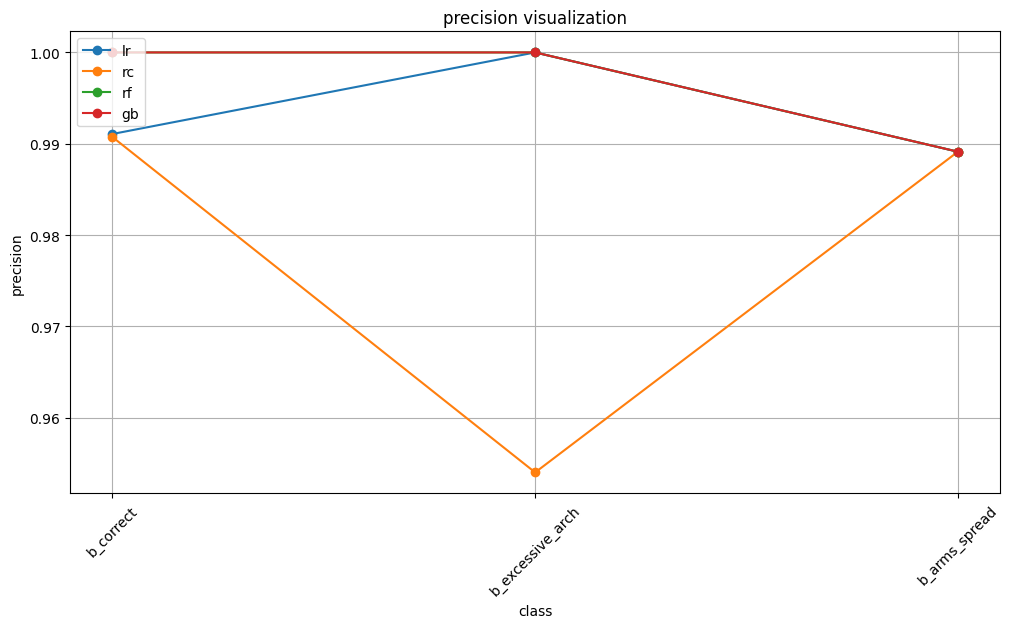

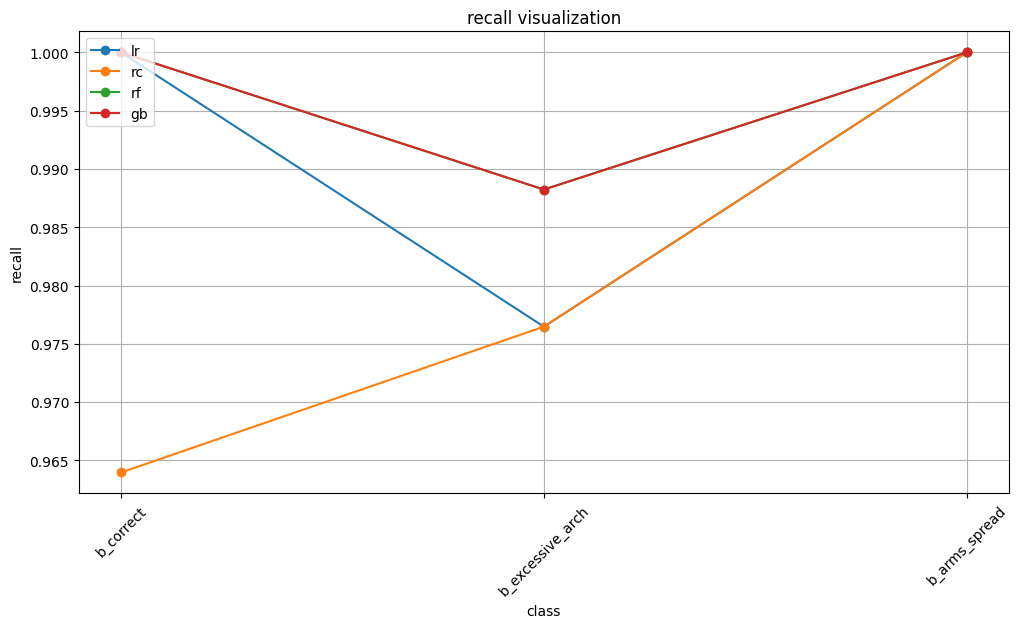

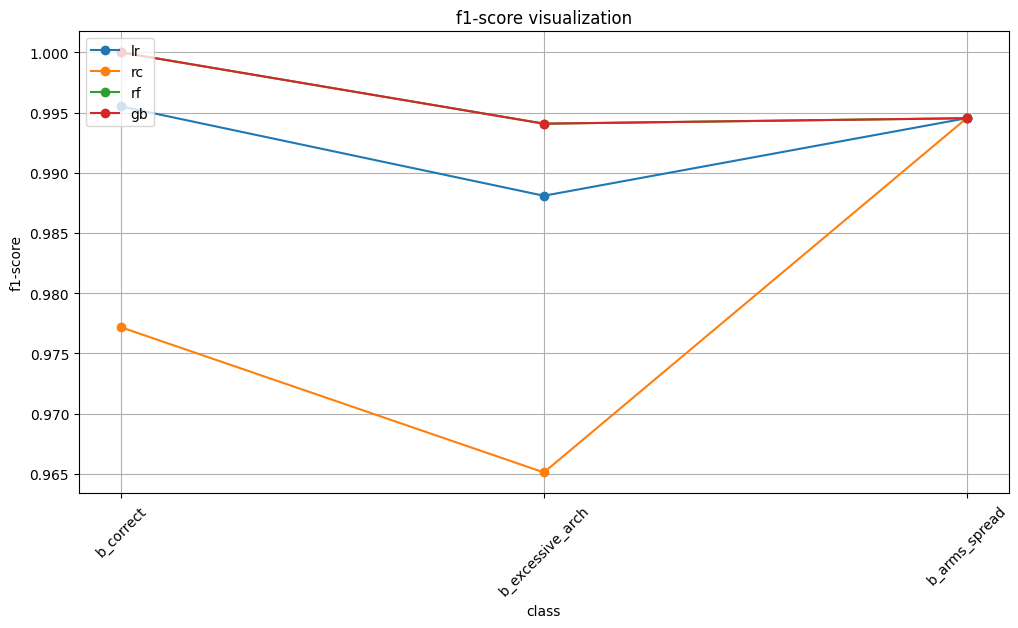

In [12]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred

metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(bp_df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [13]:
with open('./benchpress/benchpress_merged.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

## Deadlift

In [14]:
X = dl_df.drop('class', axis=1)
y = dl_df['class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [17]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [18]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [19]:
fit_models['rc'].predict(X_test)

array(['d_correct', 'd_arms_spread', 'd_correct', 'd_correct',
       'd_spine_neutral', 'd_spine_neutral', 'd_correct', 'd_correct',
       'd_correct', 'd_arms_narrow', 'd_arms_spread', 'd_spine_neutral',
       'd_correct', 'd_correct', 'd_correct', 'd_arms_spread',
       'd_arms_narrow', 'd_spine_neutral', 'd_spine_neutral',
       'd_arms_narrow', 'd_spine_neutral', 'd_spine_neutral',
       'd_arms_narrow', 'd_arms_spread', 'd_correct', 'd_correct',
       'd_arms_spread', 'd_correct', 'd_arms_narrow', 'd_spine_neutral',
       'd_spine_neutral', 'd_correct', 'd_correct', 'd_correct',
       'd_spine_neutral', 'd_correct', 'd_correct', 'd_correct',
       'd_arms_narrow', 'd_correct', 'd_arms_spread', 'd_arms_spread',
       'd_arms_spread', 'd_arms_spread', 'd_arms_narrow', 'd_arms_narrow',
       'd_spine_neutral', 'd_arms_narrow', 'd_arms_spread', 'd_correct',
       'd_spine_neutral', 'd_correct', 'd_spine_neutral',
       'd_spine_neutral', 'd_arms_narrow', 'd_arms_narrow',

In [20]:
from sklearn.metrics import classification_report

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred 

for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr ---
                 precision    recall  f1-score   support

  d_arms_narrow       0.89      0.81      0.85        84
  d_arms_spread       0.84      0.91      0.88        70
      d_correct       0.90      0.90      0.90        92
d_spine_neutral       0.89      0.91      0.90        96

       accuracy                           0.88       342
      macro avg       0.88      0.88      0.88       342
   weighted avg       0.88      0.88      0.88       342


--- rc ---
                 precision    recall  f1-score   support

  d_arms_narrow       0.82      0.83      0.83        84
  d_arms_spread       0.86      0.96      0.91        70
      d_correct       0.93      0.85      0.89        92
d_spine_neutral       0.88      0.88      0.88        96

       accuracy                           0.87       342
      macro avg       0.87      0.88      0.87       342
   weighted avg       0.88      0.87      0.87       342


--- rf ---
                 precision    recall  f1-score 

In [21]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.8830
rc: 0.8743
rf: 0.9883
gb: 0.9678
--- precision ---
lr: 0.8840
rc: 0.8761
rf: 0.9883
gb: 0.9678
--- recall ---
lr: 0.8830
rc: 0.8743
rf: 0.9883
gb: 0.9678
--- f1-score ---
lr: 0.8827
rc: 0.8741
rf: 0.9883
gb: 0.9678


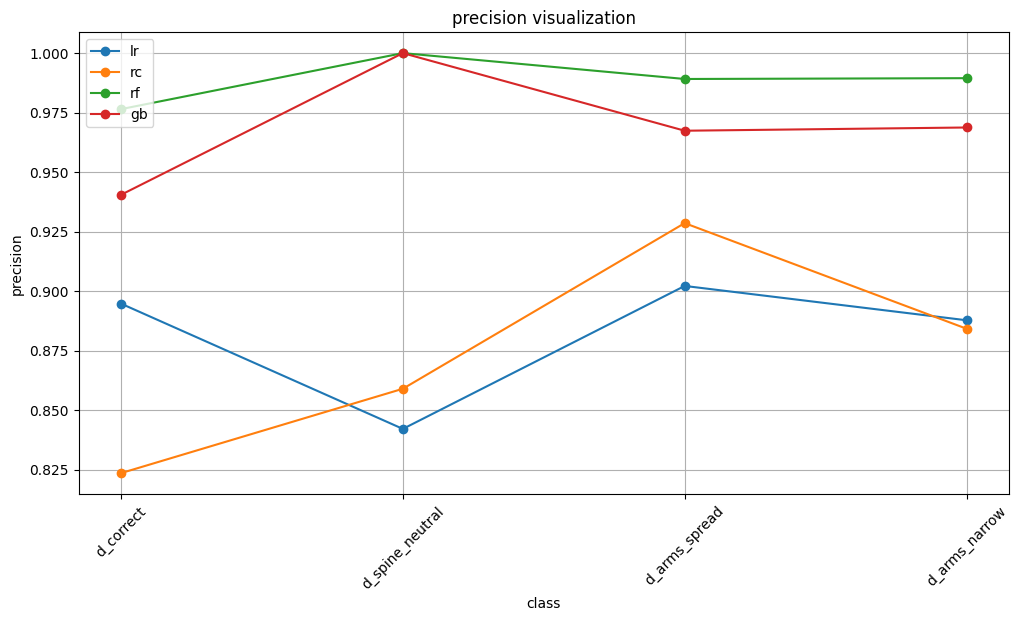

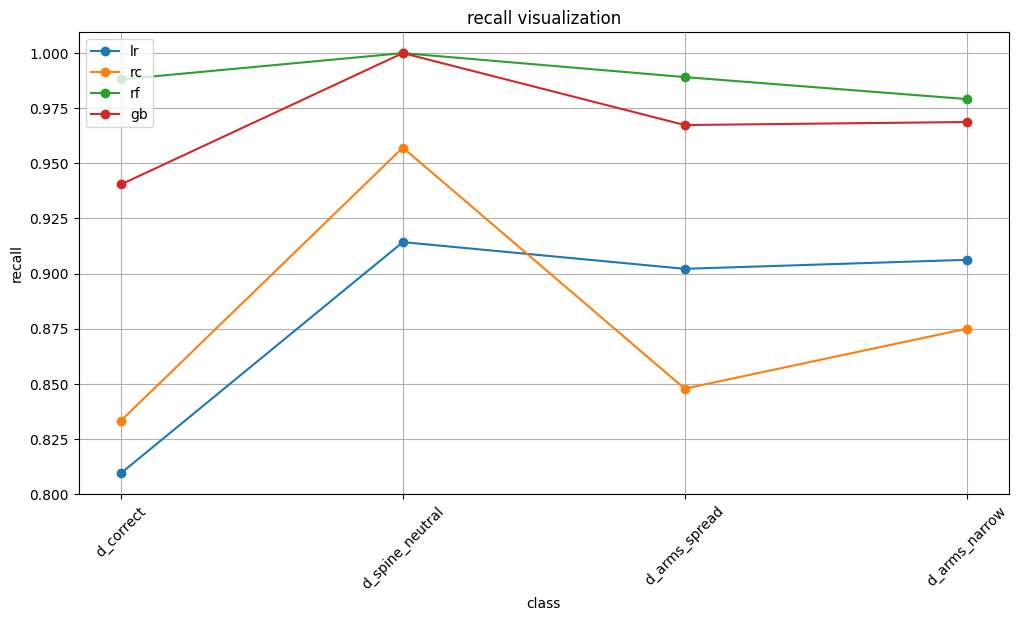

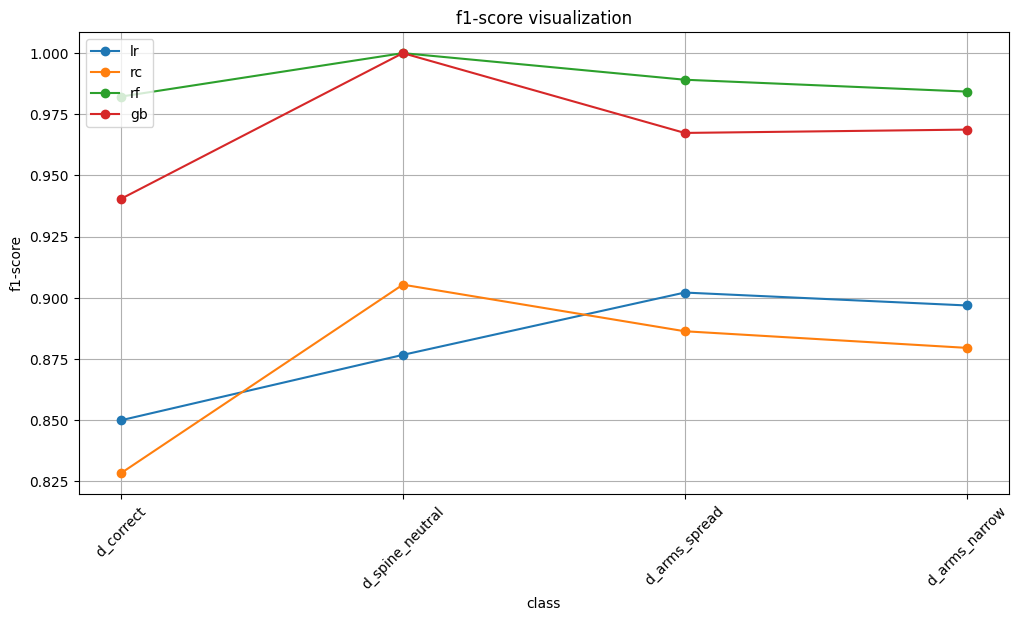

In [22]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred

metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(dl_df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [23]:
with open('./deadlift/deadlift_merged.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

## Squat

In [24]:
X = sq_df.drop('class', axis=1)
y = sq_df['class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [27]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [28]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [29]:
fit_models['rc'].predict(X_test)

array(['s_caved_in_knees', 's_spine_neutral', 's_spine_neutral',
       's_spine_neutral', 's_spine_neutral', 's_correct', 's_feet_spread',
       's_feet_spread', 's_feet_spread', 's_feet_spread',
       's_caved_in_knees', 's_correct', 's_correct', 's_caved_in_knees',
       's_correct', 's_feet_spread', 's_feet_spread', 's_caved_in_knees',
       's_caved_in_knees', 's_caved_in_knees', 's_caved_in_knees',
       's_correct', 's_spine_neutral', 's_feet_spread',
       's_caved_in_knees', 's_caved_in_knees', 's_feet_spread',
       's_spine_neutral', 's_correct', 's_spine_neutral',
       's_caved_in_knees', 's_correct', 's_feet_spread', 's_correct',
       's_caved_in_knees', 's_caved_in_knees', 's_correct',
       's_caved_in_knees', 's_feet_spread', 's_correct', 's_feet_spread',
       's_caved_in_knees', 's_feet_spread', 's_feet_spread', 's_correct',
       's_caved_in_knees', 's_correct', 's_feet_spread',
       's_spine_neutral', 's_spine_neutral', 's_spine_neutral',
       's_f

In [30]:
from sklearn.metrics import classification_report

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred 

for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr ---
                  precision    recall  f1-score   support

s_caved_in_knees       1.00      1.00      1.00        79
       s_correct       0.99      0.99      0.99        72
   s_feet_spread       1.00      1.00      1.00        65
 s_spine_neutral       0.98      0.98      0.98        63

        accuracy                           0.99       279
       macro avg       0.99      0.99      0.99       279
    weighted avg       0.99      0.99      0.99       279


--- rc ---
                  precision    recall  f1-score   support

s_caved_in_knees       1.00      1.00      1.00        79
       s_correct       1.00      0.99      0.99        72
   s_feet_spread       1.00      1.00      1.00        65
 s_spine_neutral       0.98      1.00      0.99        63

        accuracy                           1.00       279
       macro avg       1.00      1.00      1.00       279
    weighted avg       1.00      1.00      1.00       279


--- rf ---
                  precision    

In [31]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9928
rc: 0.9964
rf: 1.0000
gb: 1.0000
--- precision ---
lr: 0.9928
rc: 0.9965
rf: 1.0000
gb: 1.0000
--- recall ---
lr: 0.9928
rc: 0.9964
rf: 1.0000
gb: 1.0000
--- f1-score ---
lr: 0.9928
rc: 0.9964
rf: 1.0000
gb: 1.0000


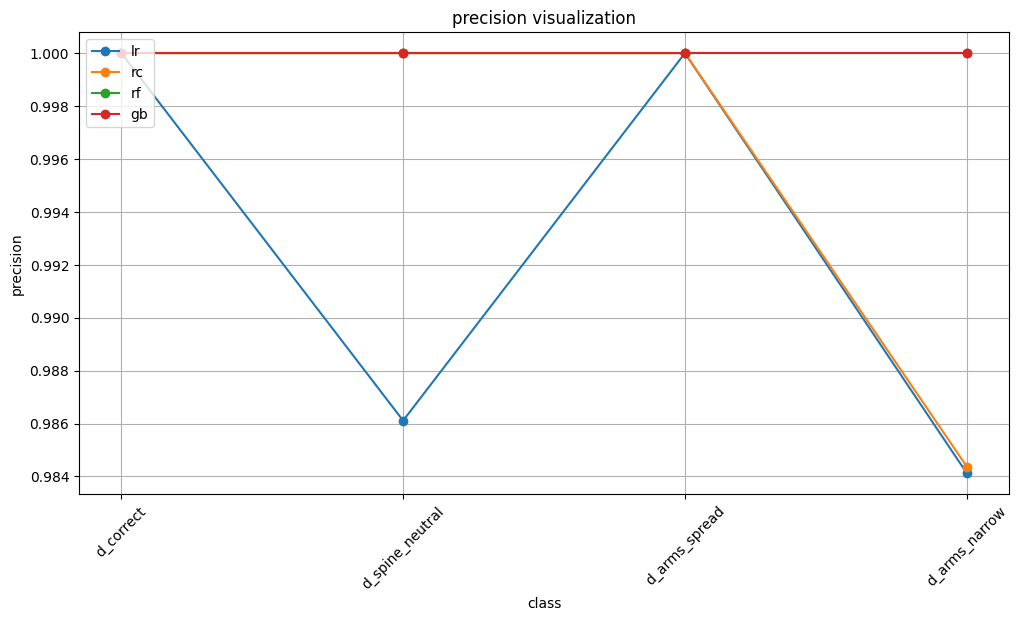

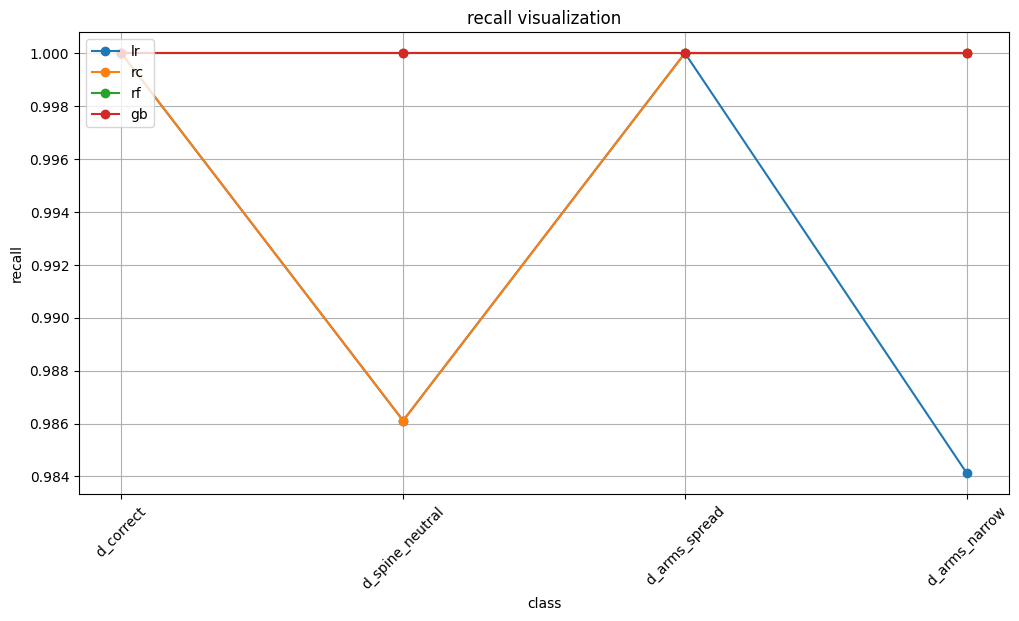

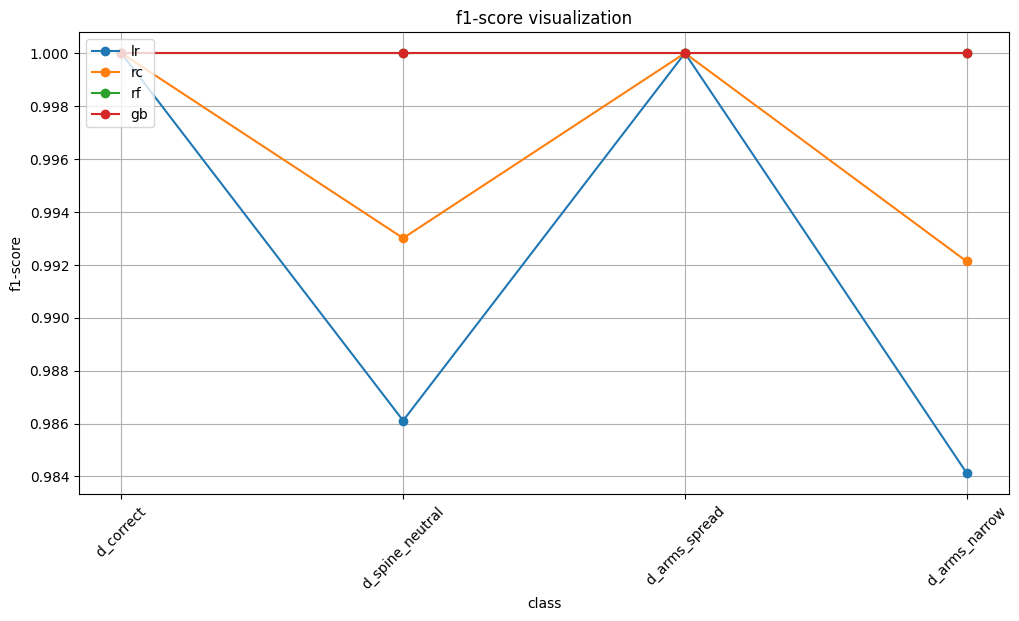

In [32]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred

metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(dl_df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [33]:
with open('./squat/squat_merged.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)